In [53]:
from Precode2 import *
import numpy as np

data = np.load('AllSamples.npy')

In [54]:
k1,i_point1,k2,i_point2 = initial_S2('9314') # please replace 0111 with your last four digit of your ID

Strategy 2: k and initial points


In [55]:
print(k1)
print(i_point1)
print(k2)
print(i_point2)

4
[6.46350009 0.77471754]
6
[3.57542555 5.47748903]


In [56]:
print(i_point1.shape) 
print(i_point2.shape) 

(2,)
(2,)


In [94]:
def k_means_clustering(data, k, init_centers):
    # Add the initial centers to the list of centers
    centers = init_centers.copy()

    # Choose the remaining k-1 centers by choosing the sample with the maximum
    # average distance to the previous centers
    for i in range(k - 1):
        dists = np.sqrt(np.sum((data[:, np.newaxis] - centers)**2, axis=2))
        min_dists = dists.min(axis=1)
        max_avg_dist_idx = np.argmax(min_dists)
        centers.append(data[max_avg_dist_idx, :])

    # Assign each data point to the closest center
    labels = np.argmin(np.sqrt(np.sum((data[:, np.newaxis] - centers)**2, axis=2)), axis=1)

    # Calculate the objective function
    obj_func = np.sum([np.sum((data[labels == i, :] - centers[i])**2) for i in range(k)])

    # Repeat until convergence
    while True:
        # Update the centers as the means of the data points assigned to each center
        centers = np.array([data[labels == i, :].mean(axis=0) for i in range(k)])
        # Reassign each data point to the closest center
        new_labels = np.argmin(np.sqrt(np.sum((data[:, np.newaxis] - centers)**2, axis=2)), axis=1)
        # Check for convergence
        if np.array_equal(labels, new_labels):
            break
        else:
            labels = new_labels

    # Calculate the objective function
    obj_func = np.sum([np.sum((data[labels == i, :] - centers[i])**2) for i in range(k)])

    return labels, centers, obj_func

In [96]:

# Cluster the data into k1=4 clusters with the given initial centroid
labels1, centers1, obj_func1 = k_means_clustering(data, k=4, init_centers=[init_centers1])

# Cluster the data into k2=6 clusters with the given initial centroid
labels2, centers2, obj_func2 = k_means_clustering(data, k=6, init_centers=[init_centers2])

In [97]:
labels1, centers1, obj_func1 

(array([1, 2, 0, 3, 2, 1, 3, 3, 3, 0, 2, 1, 1, 3, 1, 2, 0, 2, 3, 1, 3, 2,
        0, 1, 0, 0, 1, 3, 1, 3, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 3, 3, 1, 3,
        3, 0, 0, 3, 1, 1, 2, 1, 0, 1, 1, 2, 0, 3, 0, 3, 2, 2, 3, 1, 1, 0,
        2, 2, 1, 1, 3, 1, 3, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 3, 1,
        0, 3, 3, 0, 0, 3, 2, 0, 3, 2, 2, 0, 0, 2, 0, 1, 3, 3, 0, 2, 3, 0,
        0, 2, 1, 1, 0, 3, 0, 2, 3, 2, 2, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2, 3,
        2, 2, 2, 2, 0, 3, 0, 3, 0, 1, 2, 1, 1, 0, 2, 1, 3, 1, 0, 1, 1, 3,
        0, 0, 3, 3, 3, 2, 1, 2, 3, 0, 2, 2, 0, 2, 3, 3, 0, 1, 1, 2, 0, 3,
        3, 1, 1, 3, 3, 0, 2, 2, 3, 0, 2, 1, 1, 3, 1, 1, 2, 0, 1, 2, 1, 3,
        3, 3, 3, 2, 2, 3, 3, 3, 3, 0, 0, 0, 3, 2, 1, 1, 2, 3, 3, 3, 3, 3,
        0, 3, 1, 0, 1, 0, 0, 1, 1, 0, 2, 1, 1, 2, 0, 2, 3, 1, 1, 2, 0, 2,
        2, 2, 1, 1, 3, 3, 1, 2, 0, 1, 3, 3, 2, 3, 3, 2, 3, 1, 0, 3, 2, 1,
        1, 2, 1, 3, 3, 2, 1, 3, 1, 3, 2, 2, 0, 1, 3, 1, 0, 0, 1, 2, 2, 1,
        0, 2, 0, 1, 3, 3, 2, 0, 0, 1, 

In [98]:
labels2, centers2, obj_func2 

(array([4, 1, 3, 0, 0, 4, 0, 5, 2, 3, 0, 4, 4, 0, 4, 1, 3, 0, 0, 4, 0, 1,
        3, 4, 3, 3, 4, 0, 4, 2, 0, 0, 2, 4, 4, 4, 1, 0, 1, 4, 2, 2, 4, 0,
        5, 3, 3, 0, 4, 4, 1, 4, 0, 4, 4, 1, 3, 5, 0, 0, 4, 0, 2, 4, 4, 0,
        1, 1, 0, 4, 5, 4, 5, 4, 0, 3, 4, 4, 4, 1, 4, 4, 4, 1, 3, 0, 5, 4,
        3, 2, 0, 0, 3, 5, 0, 3, 5, 1, 0, 3, 3, 1, 3, 4, 2, 2, 3, 4, 0, 3,
        3, 0, 4, 4, 3, 2, 3, 1, 2, 1, 1, 4, 3, 3, 3, 4, 3, 4, 4, 4, 0, 5,
        1, 1, 1, 1, 3, 2, 3, 5, 3, 4, 0, 4, 4, 0, 1, 4, 5, 0, 3, 4, 4, 2,
        0, 3, 0, 0, 2, 0, 4, 1, 0, 0, 1, 0, 3, 1, 5, 2, 0, 0, 4, 1, 3, 2,
        5, 4, 4, 2, 5, 3, 1, 1, 5, 3, 1, 4, 4, 5, 0, 4, 0, 3, 4, 1, 4, 2,
        0, 2, 5, 1, 1, 2, 2, 5, 0, 3, 3, 3, 5, 4, 4, 4, 1, 5, 2, 5, 5, 2,
        3, 5, 4, 3, 4, 3, 3, 4, 4, 3, 1, 4, 4, 1, 3, 0, 5, 4, 4, 1, 3, 0,
        1, 4, 4, 4, 5, 0, 4, 0, 3, 0, 5, 5, 0, 2, 0, 1, 5, 4, 0, 0, 4, 4,
        4, 1, 4, 2, 5, 4, 4, 5, 4, 5, 1, 1, 3, 4, 0, 4, 3, 3, 4, 1, 0, 0,
        3, 1, 3, 4, 0, 2, 0, 3, 0, 4, 

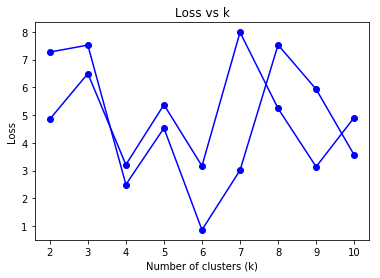

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
# Compute the loss for k=2 to k=10
ks = range(2, 11)
losses = []
for k in ks:
    centroids, loss_history, _ = k_means_clustering(data, k, init_centers)
    losses.append(loss_history[-1])

# Plot the loss vs k
plt.plot(ks, losses, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Loss')
plt.title('Loss vs k')
plt.show()